In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
import nbformat

This error typically occurs when there is a formatting issue or corruption in the Jupyter Notebook file. To resolve this issue, you can try the following steps:

1. **Check the File Format**:
    - Ensure that the file is saved with the `.ipynb` extension and is in valid JSON format.

2. **Validate the Notebook**:
    - Use an online JSON validator or a tool like `jq` to check if the notebook file is valid JSON. If there are errors, fix them manually.

3. **Open in a Text Editor**:
    - Open the notebook file in a text editor (e.g., VS Code, Notepad++) and look for any syntax errors, such as missing commas, brackets, or quotes.

4. **Recover from Checkpoints**:
    - If the notebook was previously saved, Jupyter automatically creates checkpoints. You can try restoring the notebook from a checkpoint:
      - Open Jupyter Notebook.
      - Navigate to the notebook file.
      - Click on the "File" menu and select "Revert to Checkpoint."

5. **Create a New Notebook**:
    - If the file is irreparably corrupted, create a new notebook and copy the code cells from the corrupted file into the new notebook manually.

6. **Use `nbformat` to Fix the Notebook**:
    - If you have Python installed, you can use the `nbformat` library to attempt to read and rewrite the notebook:
      ```python

      # Load the notebook
      with open("corrupted_notebook.ipynb", "r", encoding="utf-8") as f:
            notebook = nbformat.read(f, as_version=4)

      # Save the notebook back to a file
      with open("fixed_notebook.ipynb", "w", encoding="utf-8") as f:
            nbformat.write(notebook, f)
      ```

7. **Check for Hidden Characters**:
    - Sometimes, hidden or non-printable characters can cause issues. Use a text editor to remove any such characters.

If none of these steps work, you may need to manually reconstruct the notebook by extracting the code and markdown cells from the corrupted file.

In [3]:
df = pd.read_csv(r"C:\Users\yasee\Downloads\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
left = df[df.left==1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [6]:
df.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

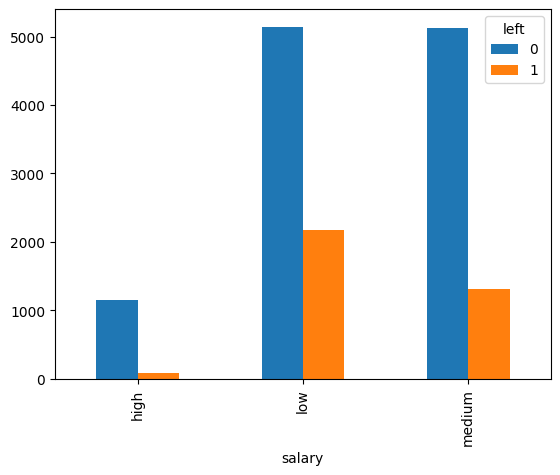

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


<Axes: xlabel='Department'>

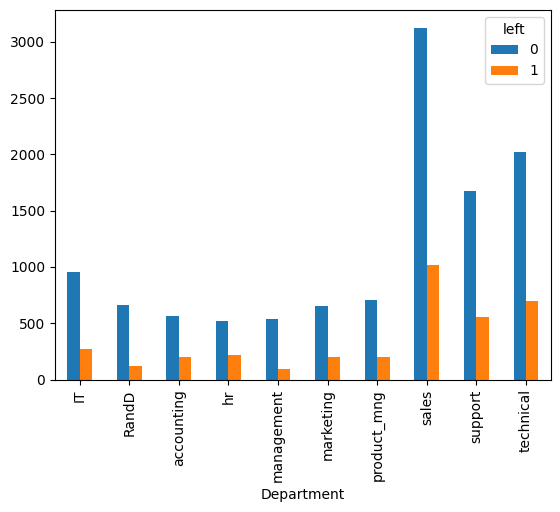

In [8]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [9]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [10]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")


In [11]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')


In [12]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [13]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [14]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [15]:
y = df.left

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [18]:
model.fit(X_train, y_train)

c:\Users\yasee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:

model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], shape=(10500,))

In [20]:
model.score(X_test,y_test)

0.7726666666666666